# Checking on Stat Autocorrelations

### MSP 7.30.2017

Following up on a point from Erich about autocorrelations.

From Wikipedia:

    Autocorrelation, also known as serial correlation, is the correlation of a signal with a delayed copy of itself as a function of delay. Informally, it is the similarity between observations as a function of the time lag between them. The analysis of autocorrelation is a mathematical tool for finding repeating patterns, such as the presence of a periodic signal obscured by noise, or identifying the missing fundamental frequency in a signal implied by its harmonic frequencies. It is often used in signal processing for analyzing functions or series of values, such as time domain signals.
    
    When computing autocorrelation, the resulting output can range from 1 to negative 1 in line with the traditional correlation statistic. An autocorrelation of 1 represents a perfect positive correlation (an increase seen in one time series leads to a proportionate increase in the other time series). An autocorrelation of negative 1, on the other hand, represents perfect negative correlation (an increase seen in one-time series results in a proportionate decrease in the other time series). Autocorrelation measures linear relationships; even if the autocorrelation is miniscule, there may still be a nonlinear relationship between a time series and a lagged version of itself.

In [4]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [6]:
# imports for scraping

from bs4 import BeautifulSoup
import requests


In [231]:
# the listing of the teams of interest (all!)

teams = ['angels','astros','athletics','bluejays','braves',\
        'brewers','cardinals','cubs','diamondbacks','dodgers',\
        'giants','indians','mariners','marlins','mets','nationals',\
        'orioles','padres','phillies','pirates','rangers',\
        'rays','redsox','rockies','royals','tigers','twins',\
        'whitesox','yankees']



In [233]:
# construct the game logs for each team    

GameLog = {}

#teams = ['diamondbacks']

for inteam in teams:

        print inteam,

        GameLog[inteam] = {}

        r  = requests.get('http://www.fangraphs.com/teams/'+inteam+'/schedule')
        # can go back seasons with ?season=2016 at end of url

        data = r.text

        soup = BeautifulSoup(data)

        table_div = soup.find('div' , {"class":"team-schedule-table"})
        table = table_div.find('table')

        # The first tr contains the field names.
        headings = [th.get_text() for th in table.find("tr").find_all("th")]

        #print headings

        # get number of games played
        ngames = 0
        for row in table.find_all("tr")[1:]:
            if [td.get_text() for td in row.find_all("td")][5] != '':
                GameLog[inteam][ngames] = {}
                sav = [td.find('a') for td in row.find_all("td")][0]
                #print sav.get('href'),sav.get('href')[0:25],sav.get('href')[29:]
                GameLog[inteam][ngames]['link'] = sav.get('href')[0:25]+'plays'+sav.get('href')[29:]
                GameLog[inteam][ngames]['box'] = sav.get('href')[0:25]+'boxscore'+sav.get('href')[29:]
                GameLog[inteam][ngames]['oppo'] = [td.get_text() for td in row.find_all("td")][8]
                GameLog[inteam][ngames]['home'] = [td.get_text() for td in row.find_all("td")][7]
                GameLog[inteam][ngames]['date'] = [td.get_text() for td in row.find_all("td")][0]
                ngames += 1       





 angels astros athletics bluejays braves brewers cardinals cubs diamondbacks dodgers giants indians mariners marlins mets nationals orioles padres phillies pirates rangers rays redsox rockies royals tigers twins whitesox yankees


### Checkpoint: Examining Patrick Corbin



In [237]:
teams2 = ['diamondbacks']
pname = 'Corbin'

teams2 = ['twins']
pname = 'Kintzler'

pa_num = 0

for inteam in teams2:
    
    print inteam

    for indx,key in enumerate(GameLog[inteam].keys()):
 

        r  = requests.get(GameLog[inteam][key]['link'])
    
        #print GameLog[key]['link']
        #print GameLog[inteam][key]['oppo'],

        data = r.text
    
        soup = BeautifulSoup(data)
        
        #table = soup.findAll('table')[8]

        #for row in table.find_all("tr")[1:]:
        #    if pname in [td.get_text() for td in row.find_all("td")][0]:
                
        #        if ('scored' in [td.get_text() for td in row.find_all("td")][6]) |\
        #                ('homered' in [td.get_text() for td in row.find_all("td")][6]):
        #            print pa_num,[td.get_text() for td in row.find_all("td")][6]
                
        #            pa_num += 1
                    

        
        try:
            table = soup.findAll('table')[8]
            
            yflag = 0
            
            

            for row in table.find_all("tr")[1:]:
            
    
                
                
                
                if pname in [td.get_text() for td in row.find_all("td")][0]:
                    
                    if yflag == 0:
                        print '\n\nDate: ',GameLog[inteam][key]['date'].split(',')[0]
                        print GameLog[inteam][key]['link']
                        yflag = 1
                
                    if ('scored' in [td.get_text() for td in row.find_all("td")][6]) |\
                        ('homered' in [td.get_text() for td in row.find_all("td")][6]):
                        print pa_num,[td.get_text() for td in row.find_all("td")][6]
                
                        pa_num += 1
                    
        except: 
            print 'table failed for',GameLog[inteam][key]['link']
            
        
                

twins


Date:  Apr 3
http://www.fangraphs.com/plays.aspx?date=2017-04-03&team=Twins&dh=0&season=2017


Date:  Apr 6
http://www.fangraphs.com/plays.aspx?date=2017-04-06&team=Twins&dh=0&season=2017


Date:  Apr 7
http://www.fangraphs.com/plays.aspx?date=2017-04-07&team=Twins&dh=0&season=2017


Date:  Apr 9
http://www.fangraphs.com/plays.aspx?date=2017-04-09&team=Twins&dh=0&season=2017
0 Avisail Garcia was hit by a pitch. Melky Cabrera scored. Tim Anderson advanced to 3B. Todd Frazier advanced to 2B.


Date:  Apr 14
http://www.fangraphs.com/plays.aspx?date=2017-04-14&team=Twins&dh=0&season=2017


Date:  Apr 16
http://www.fangraphs.com/plays.aspx?date=2017-04-16&team=Twins&dh=0&season=2017


Date:  Apr 21
http://www.fangraphs.com/plays.aspx?date=2017-04-21&team=Twins&dh=0&season=2017


Date:  Apr 23
http://www.fangraphs.com/plays.aspx?date=2017-04-23&team=Twins&dh=0&season=2017


Date:  Apr 24
http://www.fangraphs.com/plays.aspx?date=2017-04-24&team=Twins&dh=0&season=2017


Date:  Apr 28
h

In [238]:
# what about strikeouts?

#teams2 = ['yankees']
#pname = 'Pineda'
k_look_log = []
k_swing_log = []


for inteam in teams2:
    
    #print inteam

    for indx,key in enumerate(GameLog[inteam].keys()):
        
        k_look = 0
        k_swing = 0
 
        #if pname in GameLog[inteam][key]['home']:
        #    print 'Date: ',GameLog[inteam][key]['date'].split(',')[0],': ',
    
        r  = requests.get(GameLog[inteam][key]['link'])
    
        #print GameLog[key]['link']
        #print GameLog[inteam][key]['oppo'],

        data = r.text
    
        soup = BeautifulSoup(data)

        try:
            table = soup.findAll('table')[8]
            
            yflag = 0

            for row in table.find_all("tr")[1:]:
                if pname in [td.get_text() for td in row.find_all("td")][0]:
                    
                    if yflag == 0:
                        print 'Date: ',GameLog[inteam][key]['date'].split(',')[0],': ',
                        yflag = 1
                
                    if ('struck out looking' in [td.get_text() for td in row.find_all("td")][6]):
                        k_look += 1
                    
                    
                    if ('struck out swinging' in [td.get_text() for td in row.find_all("td")][6]):
                        k_swing += 1
                    
            if pname in GameLog[inteam][key]['home']:
                k_look_log.append(float(k_look))
                k_swing_log.append(float(k_swing))
                
        except:
            pass
        
print k_look_log
print k_swing_log



Date:  Apr 3 :  Date:  Apr 6 :  Date:  Apr 7 :  Date:  Apr 9 :  Date:  Apr 14 :  Date:  Apr 16 :  Date:  Apr 21 :  Date:  Apr 23 :  Date:  Apr 24 :  Date:  Apr 28 :  Date:  Apr 30 :  Date:  May 3 :  Date:  May 5 :  Date:  May 11 :  Date:  May 12 :  Date:  May 13 :  Date:  May 18 :  Date:  May 19 :  Date:  May 21 :  Date:  May 24 :  Date:  May 27 :  Date:  May 28 :  Date:  Jun 1 :  Date:  Jun 4 :  Date:  Jun 7 :  Date:  Jun 8 :  Date:  Jun 10 :  Date:  Jun 15 :  Date:  Jun 18 :  Date:  Jun 20 :  Date:  Jun 21 :  Date:  Jun 24 :  Date:  Jun 25 :  Date:  Jun 28 :  Date:  Jul 1 :  Date:  Jul 3 :  Date:  Jul 4 :  Date:  Jul 6 :  Date:  Jul 7 :  Date:  Jul 15 :  Date:  Jul 17 :  Date:  Jul 22 :  Date:  Jul 23 :  Date:  Jul 26 :  Date:  Jul 28 :  []
[]


In [239]:
# what about strikeouts?

#teams2 = ['yankees']
#pname = 'Pineda'
balls = []
strikes = []
inns = []
tbf = []
er = []
whip = []
start_date = []


for inteam in teams2:
    
    #print inteam

    for indx,key in enumerate(GameLog[inteam].keys()):
        
        k_look = 0
        k_swing = 0
 
        if pname in GameLog[inteam][key]['home']:
            print GameLog[inteam][key]['date'].split(',')[0],' ',
            start_date.append(GameLog[inteam][key]['date'].split(',')[0])
    
        r  = requests.get(GameLog[inteam][key]['box'])
    
        #print GameLog[key]['link']
        #print GameLog[inteam][key]['oppo'],

        data = r.text
    
        soup = BeautifulSoup(data)
        
        #
        # collect pitch counts
        #

        # for home team setup
        try:
            table = soup.findAll('table')[34]

            for row in table.find_all("tr")[1:]:
                if pname in [td.get_text() for td in row.find_all("td")][0]:

                    balls.append(float([td.get_text() for td in row.find_all("td")][9])) # balls
                    strikes.append(float([td.get_text() for td in row.find_all("td")][10]))# strikes

            # also need to do away setup
            table = soup.findAll('table')[36]

            for row in table.find_all("tr")[1:]:
                if pname in [td.get_text() for td in row.find_all("td")][0]:

                    balls.append(float([td.get_text() for td in row.find_all("td")][9])) # balls
                    strikes.append(float([td.get_text() for td in row.find_all("td")][10]))# strikes

            #
            # get total batters faced
            #
            table = soup.findAll('table')[14]

            for row in table.find_all("tr")[1:]:
                if pname in [td.get_text() for td in row.find_all("td")][0]:

                    inns.append(float([td.get_text() for td in row.find_all("td")][1]))
                    tbf.append(float([td.get_text() for td in row.find_all("td")][2]))
                    er.append(float([td.get_text() for td in row.find_all("td")][5]))
                    whip.append(float([td.get_text() for td in row.find_all("td")][3]) +\
                                float([td.get_text() for td in row.find_all("td")][6]))

            # get total batters faced
            table = soup.findAll('table')[15]

            for row in table.find_all("tr")[1:]:
                if pname in [td.get_text() for td in row.find_all("td")][0]:

                    inns.append(float([td.get_text() for td in row.find_all("td")][1]))
                    tbf.append(float([td.get_text() for td in row.find_all("td")][2]))
                    er.append(float([td.get_text() for td in row.find_all("td")][5]))
                    whip.append(float([td.get_text() for td in row.find_all("td")][3]) +\
                                float([td.get_text() for td in row.find_all("td")][6]))


        except:
            pass




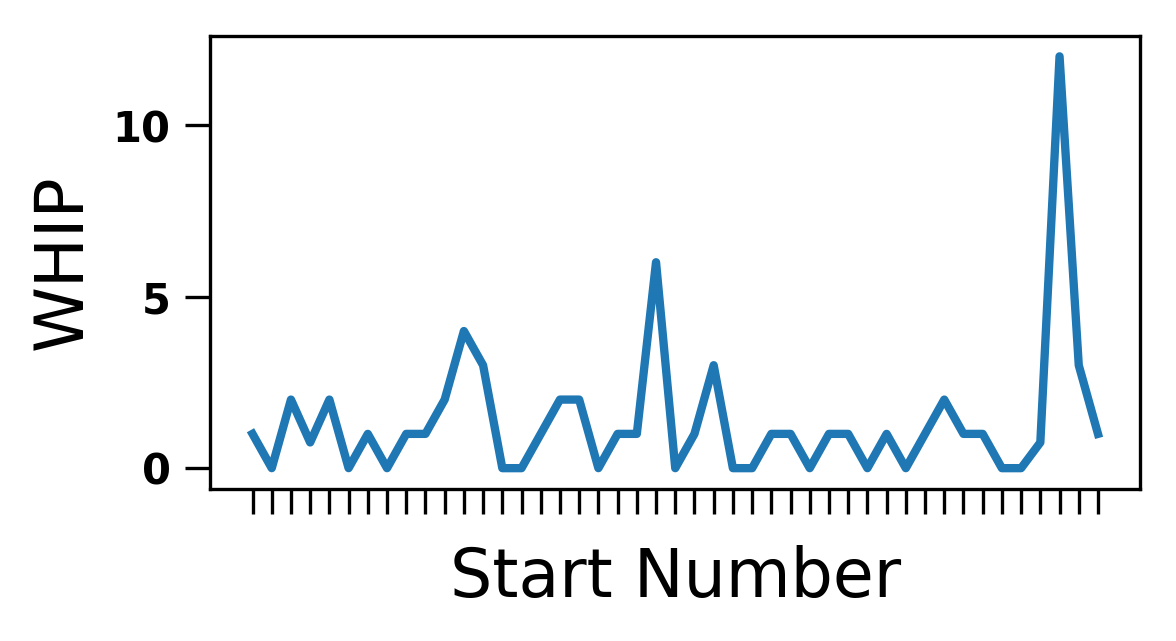

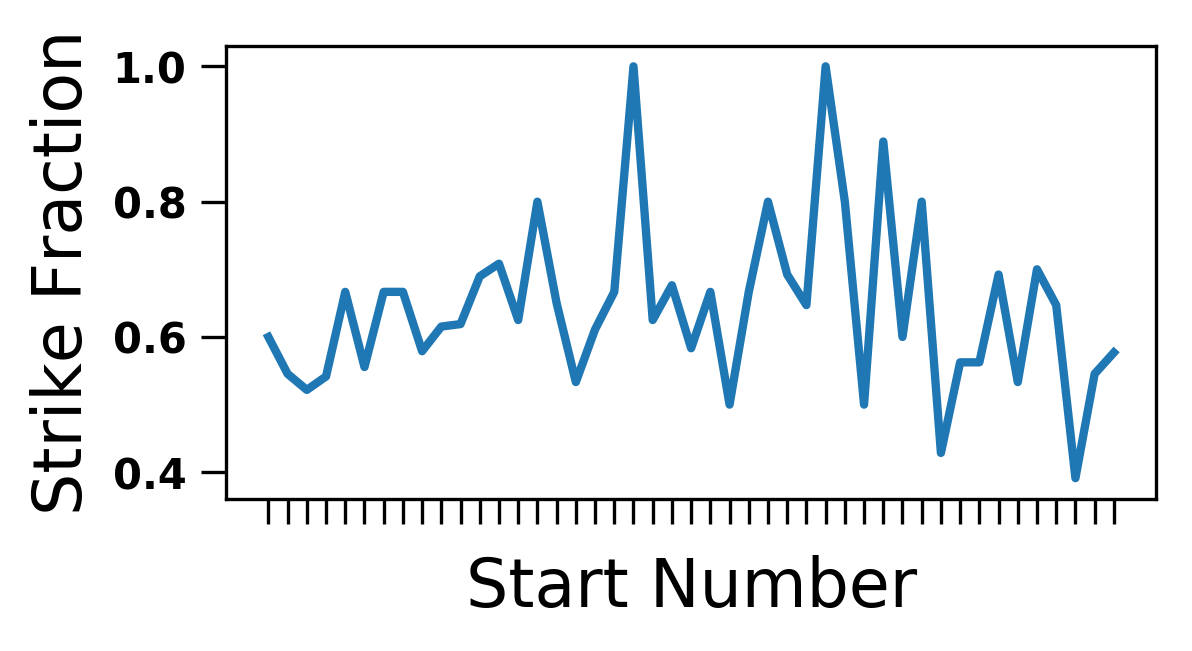

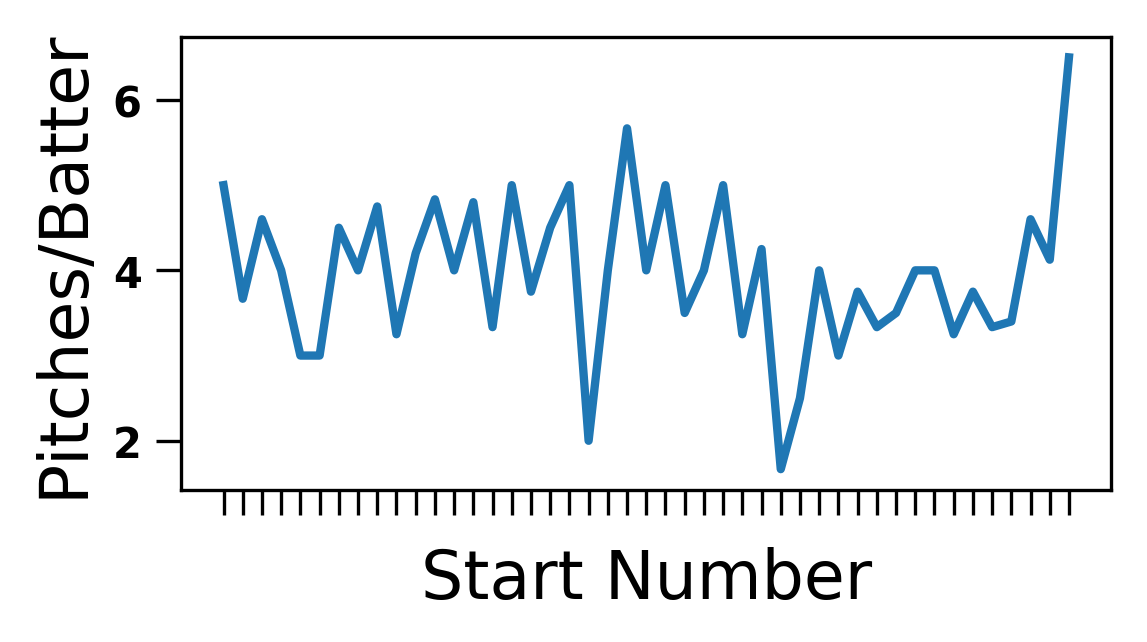

In [240]:

r_inns = np.floor(inns) + 3.33*(np.array(inns)-np.floor(inns))

fig,ax = plt.subplots(figsize=(4,2))

ax.plot(np.arange(1,np.array(whip).size+1,1),np.array(whip)/(np.array(r_inns)))
ax.set_xlabel('Start Number',size=16)
ax.set_ylabel('WHIP',size=16)
ax.set_xticks(np.arange(1,np.array(whip).size+1,1))

_ = ax.set_xticklabels(start_date, rotation=60, fontsize=10, ha='right')

    
    

fig,ax = plt.subplots(figsize=(4,2))

ax.plot(np.arange(1,np.array(whip).size+1,1),np.array(strikes)/(np.array(strikes)+np.array(balls)))
ax.set_xlabel('Start Number',size=16)
ax.set_ylabel('Strike Fraction',size=16)
ax.set_xticks(np.arange(1,np.array(whip).size+1,1))

_ = ax.set_xticklabels(start_date, rotation=60, fontsize=10, ha='right')


fig,ax = plt.subplots(figsize=(4,2))

ax.plot(np.arange(1,np.array(whip).size+1,1),(np.array(strikes)+np.array(balls))/np.array(tbf))
ax.set_xlabel('Start Number',size=16)
ax.set_ylabel('Pitches/Batter',size=16)
ax.set_xticks(np.arange(1,np.array(whip).size+1,1))

_ = ax.set_xticklabels(start_date, rotation=60, fontsize=10, ha='right')




In [241]:
from scipy.stats.stats import pearsonr

pearsonr(np.arange(1,np.array(whip).size+1,1),(np.array(strikes)+np.array(balls))/np.array(tbf))

(-0.087332873792210011, 0.56837072470029204)

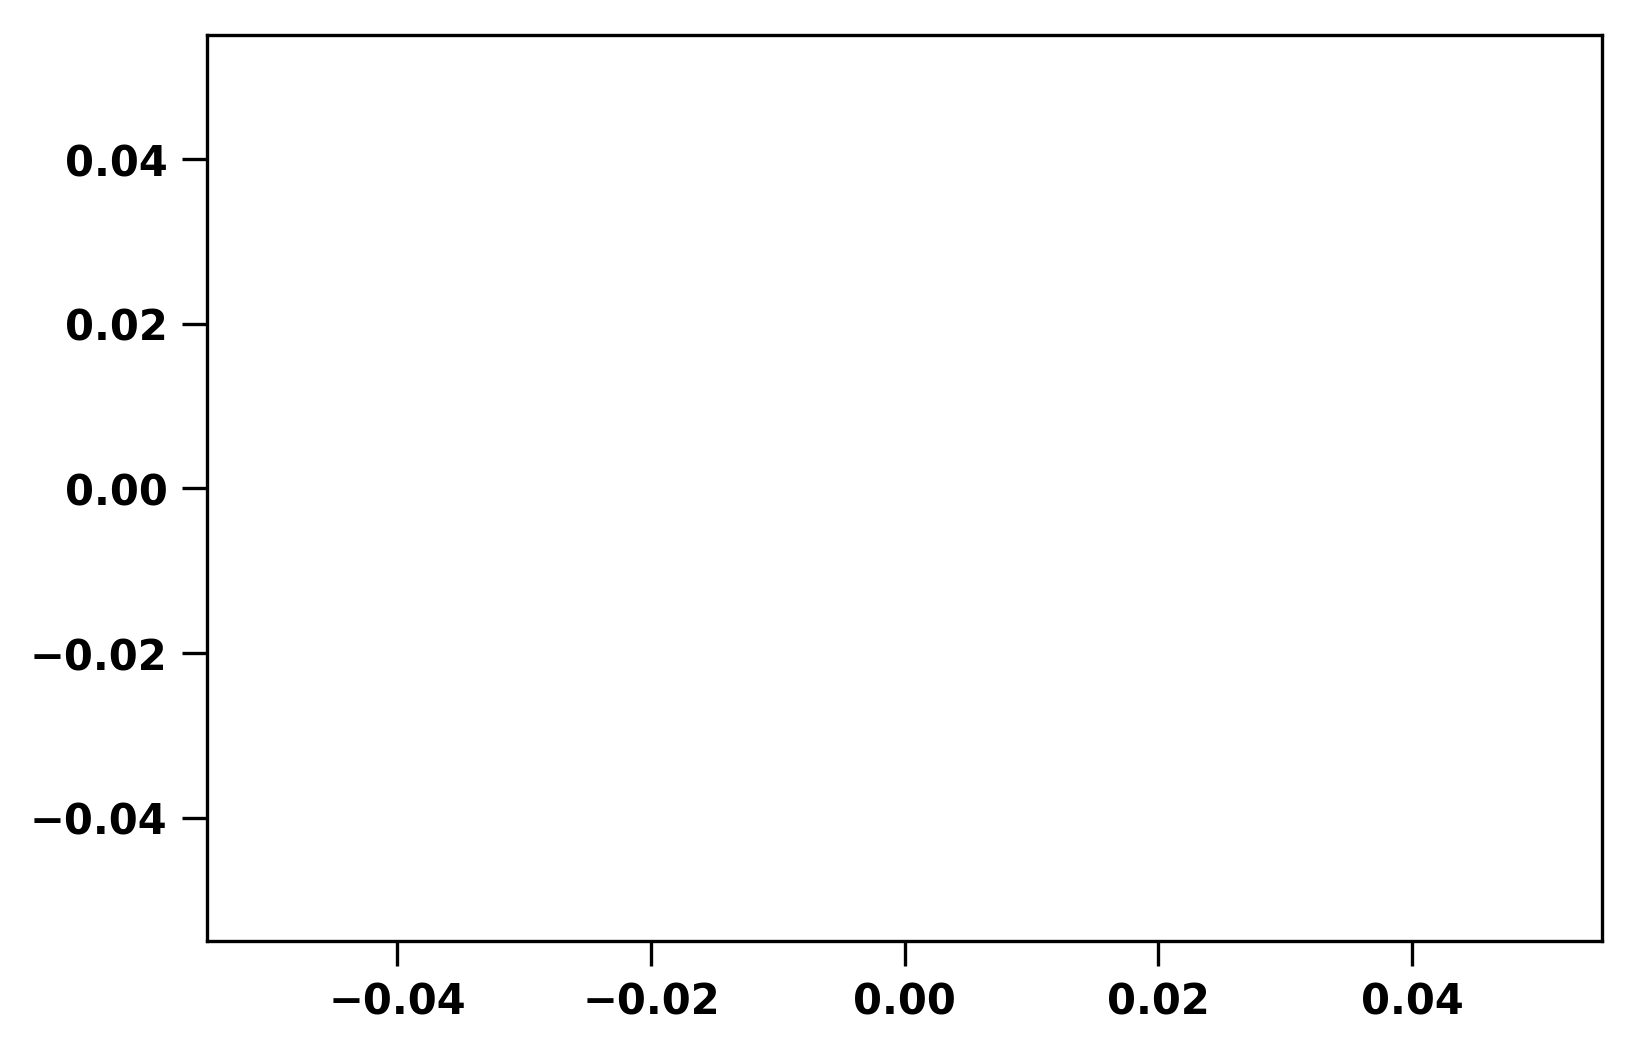

In [242]:
plt.plot(np.cumsum(k_look_log)/np.cumsum(k_swing_log))
#plt.plot(np.cumsum(k_swing_log))

In [18]:

import json
from pprint import pprint

tst_url = 'http://www.mlb.com/gdcross/components/game/mlb/year_2015/month_05/day_07/gid_2015_05_07_lanmlb_milmlb_1/game_events.json'

tst_url = 'http://www.mlb.com/gdcross/components/game/mlb/year_2017/month_06/day_30/gid_2017_06_30_nyamlb_houmlb_1/game_events.json'

r  = requests.get(tst_url)

data = json.loads(r.text)

#with r.text as data_file:    
#    data = json.load(r.text)

# number of pitches in this at-bat
print(len(data['data']['game']['inning'][0]['top']['atbat'][3]['pitch']))

print(data['data']['game']['inning'][0]['top']['atbat'][0]['pitcher'])



print(data['data']['game']['inning'][0]['top']['atbat'][3]['pitch'][0]['pitch_type'])




5
621121
CH


In [153]:
import xml

tst_url = 'http://www.mlb.com/gdcross/components/game/mlb/year_2017/month_06/day_30/gid_2017_06_30_nyamlb_houmlb_1/game_events.xml'

r  = requests.get(tst_url)



import xml.etree.ElementTree as ET
tree = ET.fromstring(r.text)


In [164]:
for child in tree:
    for grandchild in child:
         print grandchild.tag, grandchild.attrib

top {}
bottom {}
top {}
bottom {}
top {}
bottom {}
top {}
bottom {}
top {}
bottom {}
top {}
bottom {}
top {}
bottom {}
top {}
bottom {}
top {}
bottom {}


In [169]:
#for node in root.iter('pitch'):
#    print node.tag, node.attrib, 
    
#print [item.text for item in root.xpath(".//pitch")]


621121
['92.7', '92.7', '92.4', '94.2', '94.2', '95.5', '97.1', '91.7', '92.5', '93.7', '94.1', '94.6', '93.7', '93.9', '94.6', '93.1', '94.0', '95.1', '90.5', '91.3', '94.0', '91.9', '92.6', '93.8', '94.4', '94.2', '94.4', '94.3', '94.9', '95.2', '94.1', '90.7', '91.1', '90.1', '90.3', '92.1', '93.0', '91.9', '92.1', '92.0']


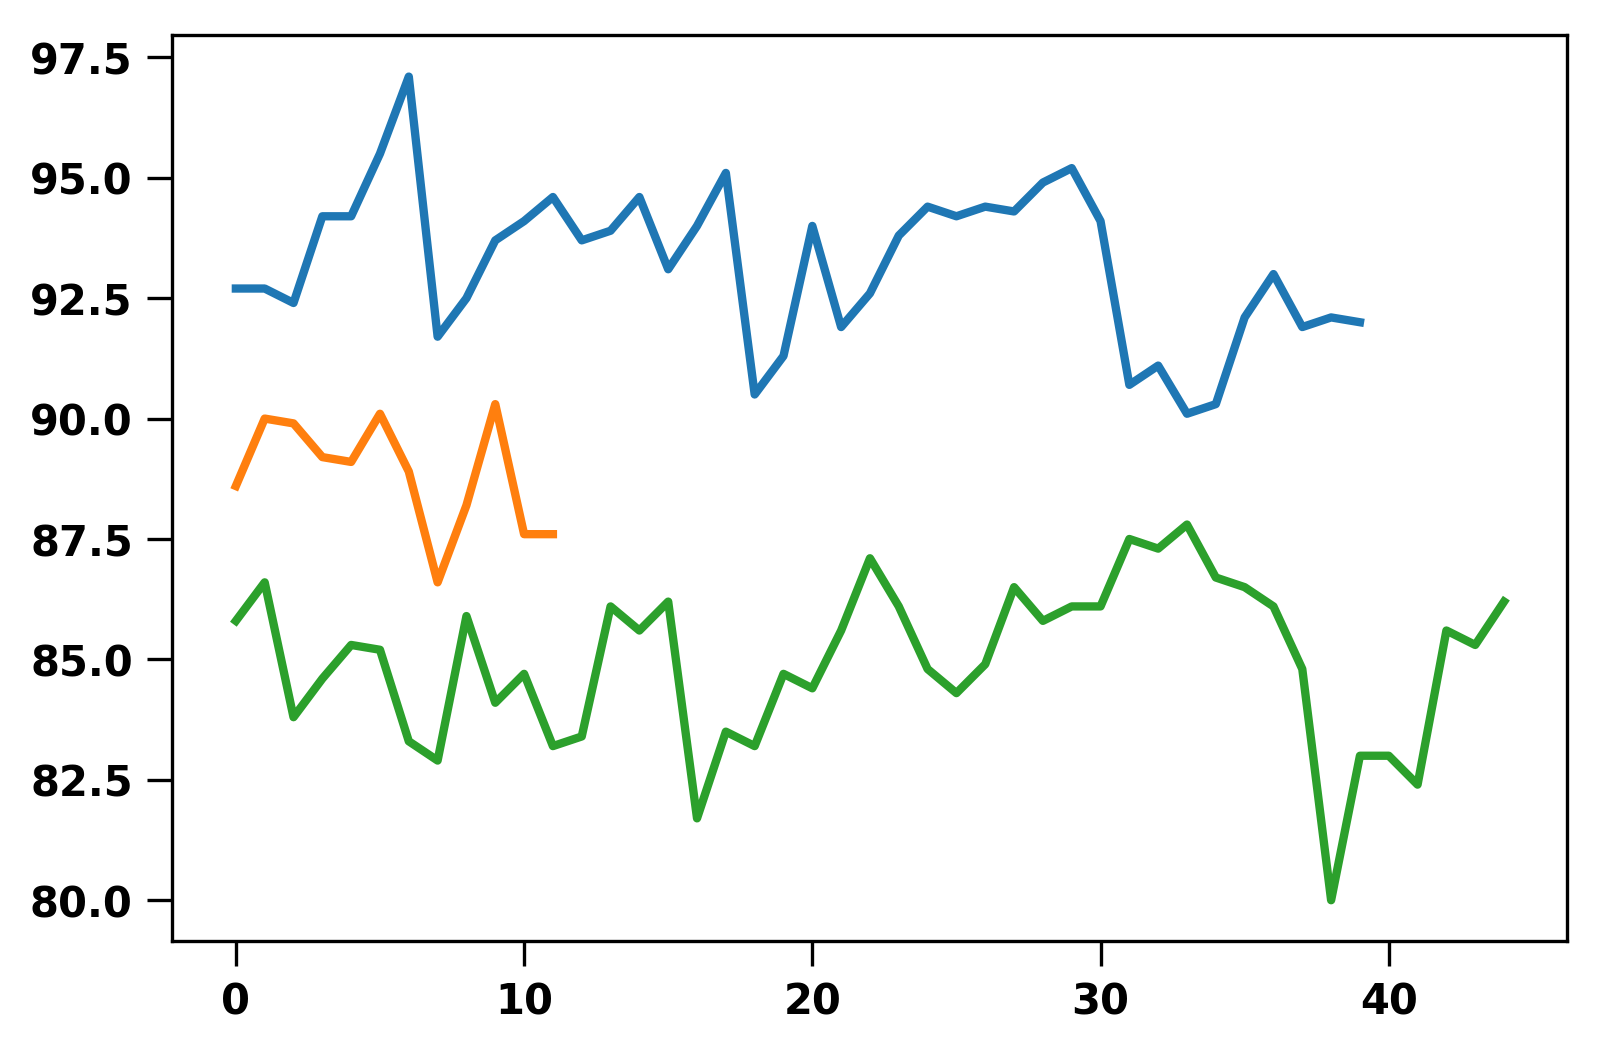

In [230]:
#print [x[0].attrib for x in root.findall(".//atbat")]

#for indx,val in enumerate(tree.findall("./inning//atbat[@event='Double']/")):

print PDict['McCullers']

Pitches = {}
Pitches['FF'] = []
Pitches['CH'] = []
Pitches['KC'] = []



for indx,val in enumerate(tree.findall("./inning//atbat[@pitcher='621121']/")):

    #print val.attrib#['pitch_type']
    #print val.attrib
    Pitches[val.attrib['pitch_type']].append(val.attrib['start_speed'])
    #print val.attrib['start_speed']


print Pitches['FF']

plt.plot(Pitches['FF'])
plt.plot(Pitches['CH'])
plt.plot(Pitches['KC'])

In [174]:
#print [x.attrib['pitch_type'] for x in root.findall("./inning//pitch")]

#print [x.attrib['pitcher'] for x in root.findall("./inning//atbat")]

for indx,val in enumerate(tree.findall("./inning//atbat")):
    if val.attrib['pitcher'] == PDict['McCullers']:
        print 'yeah!',val.attrib['des']

 yeah! Brett Gardner grounds out softly, pitcher Lance McCullers to first baseman Yuli Gurriel.  
yeah! Jacoby Ellsbury grounds out, second baseman Jose Altuve to first baseman Yuli Gurriel.  
yeah! Aaron Judge walks.  
yeah! Didi Gregorius pops out to third baseman Alex Bregman in foul territory.  
yeah! Chase Headley grounds out, first baseman Yuli Gurriel to pitcher Lance McCullers.  
yeah! Austin Romine strikes out swinging.  
yeah! Ronald Torreyes singles on a soft ground ball to pitcher Lance McCullers.  
yeah! Tyler Wade reaches on a fielding error by first baseman Yuli Gurriel.   Ronald Torreyes to 2nd.  
yeah! Chris Carter grounds out, shortstop Carlos Correa to first baseman Yuli Gurriel.  
yeah! Brett Gardner doubles (14) on a fly ball to right fielder Josh Reddick.  
yeah! Jacoby Ellsbury strikes out swinging.  
yeah! Aaron Judge strikes out swinging.  
yeah! Didi Gregorius doubles (11) on a ground ball to right fielder Josh Reddick.   Brett Gardner scores.  
yeah! Chase He

In [200]:
tst_url = 'http://www.mlb.com/gdcross/components/game/mlb/year_2017/month_06/day_30/gid_2017_06_30_nyamlb_houmlb_1/players.xml'

r  = requests.get(tst_url)



import xml.etree.ElementTree as ET
root = ET.fromstring(r.text)

#for child in root:
#     print child.tag, child.attrib
        
#print [x.attrib['last'] for x in root.findall("./team//")]

PDict = {}
for x in root.findall("./team//"):
    PDict[x.attrib['last']] = x.attrib['id']

print PDict

{'Gonzalez': '503556', 'Girardi': '114833', 'Headley': '452104', 'Marisnick': '545350', 'Pineda': '501381', 'McHugh': '543521', 'Gregorius': '544369', 'Espada': '440053', 'Montgomery': '656756', 'Cockrell': '112439', 'Dauer': '113070', 'Pena': '120370', 'Strom': '122884', 'Shreve': '592741', 'Fiers': '571666', 'Bird': '595885', 'Romine': '519222', 'Aoki': '493114', 'Brown': '440785', 'Andujar': '609280', 'Cora': '133321', 'Cessa': '570666', 'Refsnyder': '608701', 'Powell': '120710', 'Bregman': '608324', 'Gardner': '458731', 'Torreyes': '591720', 'Giles': '571704', 'Harris': '501789', 'Ellsbury': '453056', 'Reddick': '502210', 'McCann': '435263', 'Pettis': '120481', 'Judge': '592450', 'Hudgens': '116256', 'Martes': '642564', 'Springer': '543807', 'McCullers': '621121', 'Gregerson': '502381', 'Peacock': '502748', 'Munoz': '666485', 'Rothschild': '121495', 'Chapman': '547973', 'Matsui': '425686', 'Tanaka': '547888', 'Gattis': '594828', 'Bracamonte': '612538', 'Green': '643338', 'Severino'